## Parte 1 - Instalando e importando bibliotecas que serão utilizadas

executar os códigos no terminal!

<code>conda create --yes --name workshop1 python=3.7</code>

<code>conda activate workshop1</code>

<code>conda install jupyterlab=2.2.6</code>

<code>conda install -c conda-forge pyproj=2.4.2.post1</code>

<code>conda install -c conda-forge descartes=1.1.0</code>

<code>conda install -c conda-forge geopandas=0.8.1</code>

<code>conda install -c conda-forge geopy=2.0.0</code>

<code>conda install pandas</code>

<code>conda install numpy</code>

<code>conda install matplotlib</code>

In [1]:
# Importando bibliotecas que serao utilizadas
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes
import pyproj
import shapely.wkt
import seaborn as sns
import geopy.distance
from shapely.geometry import Point
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

%matplotlib inline

## Parte 2 - Importando as informações do DataSet proposta para o projeto

In [2]:
# lendo o conjunto de dados
df = pd.read_csv('Real_State_Properati.csv', sep = '\t')
df_original = df.copy()

## Parte 3 - Entender o que cada coluna significa.

property_type : Tipo de propriedade.

place_name : Nome do bairro.

country_name : Nome do pais.

state_name: Localidade da propriedade.

lat : Latitude

lon : Longitude

price : Preco publicado na propaganda.

currency : tipo de moeda utilizada no anuncio.

surface_total_in_m2 : metragem da area do imovel.

## Parte 3 - Entender o que cada coluna significa.

Tipo de propriedade.
Nome do bairro.
Nome do pais.
Localização da propriedade.
Latitude
Longitude
Preço publicado na propaganda.
tipo de moeda utilizada no anuncio.
metragem da area do imovel.

In [3]:
# checando as primeiras linhas do conjunto
df.head()

,property_type,place_name,country_name,state_name,lat,lon,price,currency,surface_total_in_m2
0,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,55.0
1,apartment,Mataderos,Argentina,Capital Federal,-34.652262,-58.522982,72000.0,USD,55.0
2,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,138000.0,USD,45.0
3,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,195000.0,USD,65.0
4,PH,Mataderos,Argentina,Capital Federal,-34.652356,-58.501624,239000.0,USD,140.0


## Após avaliar como os dados estão distribuídos no dataset, nota-se que não existem valores nulos.

In [4]:
# informação das colunas para ver se existem campos nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17223 entries, 0 to 17222
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        17223 non-null  object 
 1   place_name           17223 non-null  object 
 2   country_name         17223 non-null  object 
 3   state_name           17223 non-null  object 
 4   lat                  17223 non-null  float64
 5   lon                  17223 non-null  float64
 6   price                17223 non-null  float64
 7   currency             17223 non-null  object 
 8   surface_total_in_m2  17223 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.2+ MB


## Convertendo os valores de habitação que estão precificados em Peso Argentino para Dólares dos EUA
Após avaliação inicial nota-se que grande parte das informações estão precificadas em USD

In [5]:
# convertendo preços com moeda ARS para USD

#1 ARS =  0.0085 USD

df['price_ajustado'] = df['price']

df['currency_ajustado'] = df['currency']

df.loc[df['currency'] =='ARS', 'price_ajustado'] = df['price'] * 0.0085

df.loc[df['currency'] =='ARS', 'currency_ajustado'] = df['currency'] = 'USD'

df['price_m2'] = df['price_ajustado'] / df['surface_total_in_m2'] # Variável target é o preço por metro quadrado

Criando o campo com os pontos plotados na Argentina

In [6]:
# criando o campo da geometria

df['geometry'] = gpd.points_from_xy(df['lat'], df['lon'])
df.head()

,property_type,place_name,country_name,state_name,lat,lon,price,currency,surface_total_in_m2,price_ajustado,currency_ajustado,price_m2,geometry
0,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,55.0,62000.0,USD,1127.272727,POINT (-34.66182 -58.50884)
1,apartment,Mataderos,Argentina,Capital Federal,-34.652262,-58.522982,72000.0,USD,55.0,72000.0,USD,1309.090909,POINT (-34.65226 -58.52298)
2,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,138000.0,USD,45.0,138000.0,USD,3066.666667,POINT (-34.55987 -58.44336)
3,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,195000.0,USD,65.0,195000.0,USD,3000.000000,POINT (-34.55987 -58.44336)
4,PH,Mataderos,Argentina,Capital Federal,-34.652356,-58.501624,239000.0,USD,140.0,239000.0,USD,1707.142857,POINT (-34.65236 -58.50162)


## Avaliando distribuição dos dados.

#### Nota-se que todos os nossos dados estão localizados na Argentina e em sua Capital Federal (Buenos Aires).

#### Os dados das habitações estão concentrados em casas classificadas como "Apartamentos"

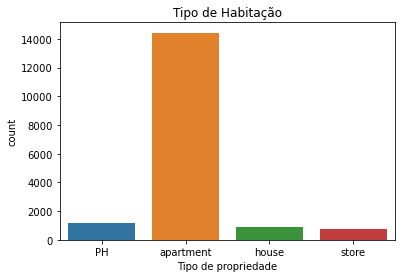

In [7]:
# grande parte dos imoveis estão concentrados em apartamentos
sns.countplot(data = df, x = 'property_type')
plt.title('Tipo de Habitação')
plt.xlabel('Tipo de propriedade')
plt.show()

In [8]:
df['place_name'].value_counts(normalize = True) * 100

Palermo            8.720896
Belgrano           8.686059
Caballito          8.064797
Recoleta           5.811996
Flores             5.184927
                     ...   
Parque Chas        0.087093
Palermo Viejo      0.058062
Villa Soldati      0.040643
Villa Riachuelo    0.017419
Catalinas          0.005806
Name: place_name, Length: 62, dtype: float64

In [9]:
df['place_name'].unique()

array(['Mataderos', 'Belgrano', 'Palermo', 'Flores', 'Boedo',
       'Las Cañitas', 'Puerto Madero', 'Balvanera', 'Caballito', 'Nuñez',
       'Floresta', 'Barracas', 'Recoleta', 'Congreso', 'Villa Crespo',
       'Chacarita', 'Almagro', 'Constitución', 'Colegiales',
       'Villa Urquiza', 'Barrio Norte', 'Palermo Hollywood', 'Saavedra',
       'Paternal', 'Agronomía', 'Villa Pueyrredón', 'Coghlan',
       'Parque Centenario', 'San Telmo', 'Monserrat', 'Boca',
       'Parque Avellaneda', 'San Cristobal', 'Abasto', 'Versalles',
       'Villa del Parque', 'Monte Castro', 'Retiro', 'Capital Federal',
       'Parque Chas', 'Palermo Chico', 'Villa Devoto', 'Palermo Soho',
       'Centro / Microcentro', 'Liniers', 'Tribunales', 'Once',
       'San Nicolás', 'Parque Chacabuco', 'Velez Sarsfield', 'Catalinas',
       'Pompeya', 'Parque Patricios', 'Palermo Viejo', 'Villa Lugano',
       'Villa Luro', 'Villa General Mitre', 'Villa Ortuzar',
       'Villa Santa Rita', 'Villa Soldati', 'Villa Re

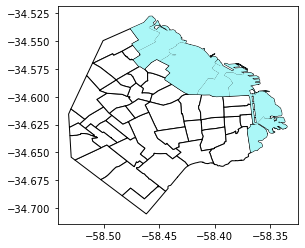

In [10]:
df_bairros = pd.read_csv("Neighborhoods.csv", 
                         encoding = 'latin1'
                        )

import shapely.wkt

df_bairros["WKT"] = df_bairros["WKT"].apply(shapely.wkt.loads) 
geo_bairros = gpd.GeoDataFrame(df_bairros, geometry = 'WKT')

fig, ax = plt.subplots()
ax.set_aspect('equal')
geo_bairros.plot(ax = ax,
                 color = 'white',
                 edgecolor = 'black'
                )

labels_subconjunto = ['PUERTO MADERO','BELGRANO', 'PALERMO', 'RETIRO', 'BOCA', 'RECOLETA', 'NUÑEZ']   #escolher o subconjunto !!!

geo_subconjunto = geo_bairros.loc[geo_bairros['NEIGHBORHOOD'].isin(labels_subconjunto)]

geo_subconjunto.plot(ax = ax,
                    color = '#abf7f7'
                    # edge_color = 'red'
                    )

plt.show();

In [11]:
#Escolhemos com propósito o subconjunto de imóveis, 'apartamentos na zona litorânea'

bairros_subconjunto = ['Puerto Madero', 'Palermo', 'Belgrano', 'Retiro', 'Boca', 'Recoleta', 'Nuñez']
mask_subconjunto = (df['place_name'].isin(bairros_subconjunto)) & (df['property_type'].isin(['apartment']))

df_subconjunto = df[mask_subconjunto]

In [12]:
df_subconjunto.sample(10)

,property_type,place_name,country_name,state_name,lat,lon,price,currency,surface_total_in_m2,price_ajustado,currency_ajustado,price_m2,geometry
5136,apartment,Belgrano,Argentina,Capital Federal,-34.573523,-58.532352,98000.0,USD,37.0,98000.0,USD,2648.648649,POINT (-34.57352 -58.53235)
1774,apartment,Recoleta,Argentina,Capital Federal,-34.588583,-58.387745,665000.0,USD,110.0,665000.0,USD,6045.454545,POINT (-34.58858 -58.38775)
3258,apartment,Belgrano,Argentina,Capital Federal,-34.562084,-58.456686,77000.0,USD,28.0,77000.0,USD,2750.000000,POINT (-34.56208 -58.45669)
12048,apartment,Belgrano,Argentina,Capital Federal,-34.571584,-58.449378,82000.0,USD,22.0,82000.0,USD,3727.272727,POINT (-34.57158 -58.44938)
15629,apartment,Recoleta,Argentina,Capital Federal,-34.589546,-58.397364,370000.0,USD,118.0,370000.0,USD,3135.593220,POINT (-34.58955 -58.39736)
15974,apartment,Palermo,Argentina,Capital Federal,-34.595721,-58.415229,129000.0,USD,46.0,129000.0,USD,2804.347826,POINT (-34.59572 -58.41523)
13181,apartment,Belgrano,Argentina,Capital Federal,-34.547769,-58.456525,1500000.0,USD,294.0,1500000.0,USD,5102.040816,POINT (-34.54777 -58.45652)
6286,apartment,Belgrano,Argentina,Capital Federal,-34.562743,-58.439265,370000.0,USD,118.0,370000.0,USD,3135.593220,POINT (-34.56274 -58.43927)
8403,apartment,Recoleta,Argentina,Capital Federal,-34.590064,-58.391931,480000.0,USD,165.0,480000.0,USD,2909.090909,POINT (-34.59006 -58.39193)
16120,apartment,Belgrano,Argentina,Capital Federal,-34.565739,-58.465195,119000.0,USD,43.0,119000.0,USD,2767.441860,POINT (-34.56574 -58.46520)


### Feature Engineering

In [13]:
dict_bairro_pop = {'Palermo': 225970,  #População por Bairro (censo 2010)
                   'Puerto Madero': 6726,
                   'Belgrano': 126831,
                   'Retiro': 65413,
                   'Boca': 45113,
                   'Recoleta': 157932,
                   'Nuñez': 51949}

dict_bairro_pop_dens = {'Palermo': 14324, #Densidade populacional por Bairro (pop/km2, censo 2010)
                        'Puerto Madero': 1338,
                        'Belgrano': 15978,
                        'Retiro': 14450,
                        'Boca': 8981,
                        'Recoleta': 25100,
                        'Nuñez': 11943}

dict_boas_universidades = {'Palermo': 1, #Se o bairro tem várias e boas universidades
                           'Puerto Madero': 0,
                           'Belgrano': 0,
                           'Retiro': 1,
                           'Boca': 0,
                           'Recoleta': 1,
                           'Nuñez': 0}

dict_pontos_turisticos = {'Palermo': 1, #Se o bairro tem pontos turísticos interessantes (talvez seja melhor calcular distâncias e adicionar pesos a cada um dos pontos turísticos)
                          'Puerto Madero': 1,
                          'Belgrano': 0,
                          'Retiro': 1,
                          'Boca': 0,
                          'Recoleta': 1,
                          'Nuñez': 0}

In [14]:
df_subconjunto['bairro_pop'] = df_subconjunto['place_name'].map(dict_bairro_pop)
df_subconjunto['bairro_pop_dens'] = df_subconjunto['place_name'].map(dict_bairro_pop_dens)
df_subconjunto['boas_unis'] = df_subconjunto['place_name'].map(dict_boas_universidades)
df_subconjunto['ptos_turisticos'] = df_subconjunto['place_name'].map(dict_pontos_turisticos)

c:\Users\Felipe\anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\Users\Felipe\anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\Felipe\anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [15]:
df_subconjunto.sample(5)

,property_type,place_name,country_name,state_name,lat,lon,price,currency,surface_total_in_m2,price_ajustado,currency_ajustado,price_m2,geometry,bairro_pop,bairro_pop_dens,boas_unis,ptos_turisticos
11178,apartment,Puerto Madero,Argentina,Capital Federal,-34.614709,-58.362019,273987.0,USD,57.0,273987.000,USD,4806.789474,POINT (-34.61471 -58.36202),6726,1338,0,1
15137,apartment,Recoleta,Argentina,Capital Federal,-34.586038,-58.402708,107473.0,USD,34.0,107473.000,USD,3160.970588,POINT (-34.58604 -58.40271),157932,25100,1,1
1664,apartment,Palermo,Argentina,Capital Federal,-34.584424,-58.419812,250000.0,USD,91.0,250000.000,USD,2747.252747,POINT (-34.58442 -58.41981),225970,14324,1,1
110,apartment,Boca,Argentina,Capital Federal,-34.634496,-58.363134,94000.0,USD,55.0,94000.000,USD,1709.090909,POINT (-34.63450 -58.36313),45113,8981,0,0
14337,apartment,Belgrano,Argentina,Capital Federal,-34.569867,-58.457581,2406048.0,USD,39.0,20451.408,USD,524.395077,POINT (-34.56987 -58.45758),126831,15978,0,0


In [16]:
df_subconjunto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4524 entries, 2 to 17221
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   property_type        4524 non-null   object  
 1   place_name           4524 non-null   object  
 2   country_name         4524 non-null   object  
 3   state_name           4524 non-null   object  
 4   lat                  4524 non-null   float64 
 5   lon                  4524 non-null   float64 
 6   price                4524 non-null   float64 
 7   currency             4524 non-null   object  
 8   surface_total_in_m2  4524 non-null   float64 
 9   price_ajustado       4524 non-null   float64 
 10  currency_ajustado    4524 non-null   object  
 11  price_m2             4524 non-null   float64 
 12  geometry             4524 non-null   geometry
 13  bairro_pop           4524 non-null   int64   
 14  bairro_pop_dens      4524 non-null   int64   
 15  boas_unis           

In [17]:
df = df_subconjunto.copy() #Renomeando o subconjunto para o dataframe original (assim mantemos a parte de limpeza dos dados sem alterações de código)

## Nota-se que os valores dos apartamentos contém diversos outliers.

### As observações consideradas outliers serão removidas.

## Remoção de Outliers - Coluna Tamanho da habitação

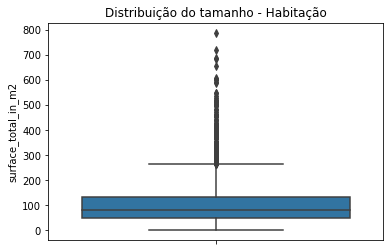

In [18]:
sns.boxplot(data = df, y ='surface_total_in_m2')
plt.title('Distribuição do tamanho - Habitação')
plt.show()

In [19]:
q3, q1 = np.percentile(df['surface_total_in_m2'], [75, 25])

interquartil = q3 - q1

limsup = q3 + 1.5 * interquartil
print(f'Limite superior do corte: {limsup}')


Limite superior do corte: 264.0


In [20]:
df = df.drop(df[df['surface_total_in_m2'] > limsup].index)
df.shape

(4287, 17)

In [21]:
# retirar metragem = 0

zeros = df['surface_total_in_m2'] == 0
df = df[~zeros]

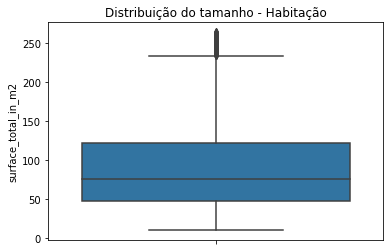

In [22]:
sns.boxplot(data = df, y = 'surface_total_in_m2')
plt.title('Distribuição do tamanho - Habitação')
plt.show()

In [23]:
# df[['surface_total_in_m2', 'distancia', 'price_m2']].sort_values(by = 'surface_total_in_m2', ascending= True).head(20)  
#Pode ser interessante retirar os imóveis com área muito pequena

## Remoção de Outliers - Coluna preço

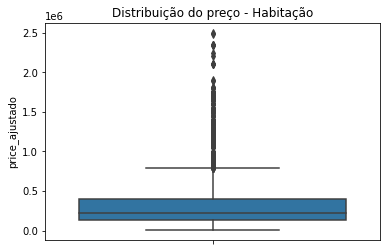

In [24]:
# distribuição do preço
sns.boxplot(data= df, y='price_ajustado')
plt.title('Distribuição do preço - Habitação')
plt.show()

In [25]:
q3, q1 = np.percentile(df['price_ajustado'], [75, 25])

interquartil = q3 - q1

limsup = q3 + 1.5 * interquartil
print(f'Limite superior do corte: {limsup}')

Limite superior do corte: 785000.0


In [26]:
df = df.drop(df[df['price_ajustado'] > limsup].index)
df.shape

(3986, 17)

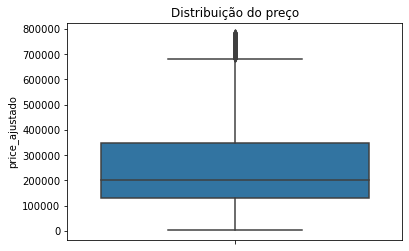

In [27]:
# distribuição do preço
sns.boxplot(data= df, y='price_ajustado')
plt.title('Distribuição do preço')
plt.show()

## Calculando a distância de cada propriedade para o marco zero da argentina

### Removendo 1 outlier presente nos dados (ditância 630km do centro)

In [28]:
# calculando distancia para o centro

ponto_marcozero = (-34.609447506344914, -58.38743491792922)

In [29]:
for i in df.index:
    df.loc[i, 'distancia'] = geopy.distance.geodesic(ponto_marcozero,
                                                     (df.loc[i, 'geometry'].x,
                                                      df.loc[i, 'geometry'].y)
                                                     ).kilometers

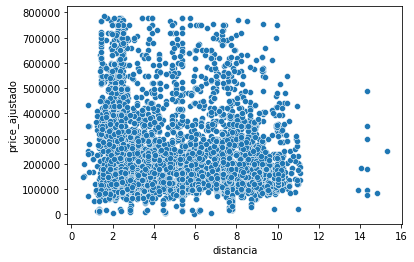

In [30]:
sns.scatterplot(
    data=df,
    y = 'price_ajustado',
    x = 'distancia'
)
plt.show()

In [31]:
df['distancia'].describe()

count    3986.000000
mean        5.358810
std         2.784943
min         0.548568
25%         2.646580
50%         5.162926
75%         7.855169
max        15.299520
Name: distancia, dtype: float64

In [32]:
_i = df[df['distancia'] > 600].index

df.drop(_i, inplace=True)
df.shape

(3986, 18)

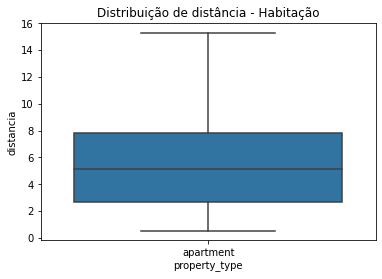

In [33]:
sns.boxplot(data = df,
            y = 'distancia',
            x = 'property_type'
            )
plt.title('Distribuição de distância - Habitação')
plt.show()

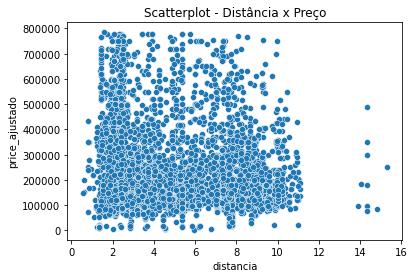

In [34]:
sns.scatterplot(
    data=df,
    y = 'price_ajustado',
    x = 'distancia'
)
plt.title('Scatterplot - Distância x Preço')
plt.show()

In [35]:
df.shape

(3986, 18)

## Checando a correlação de Features e Target

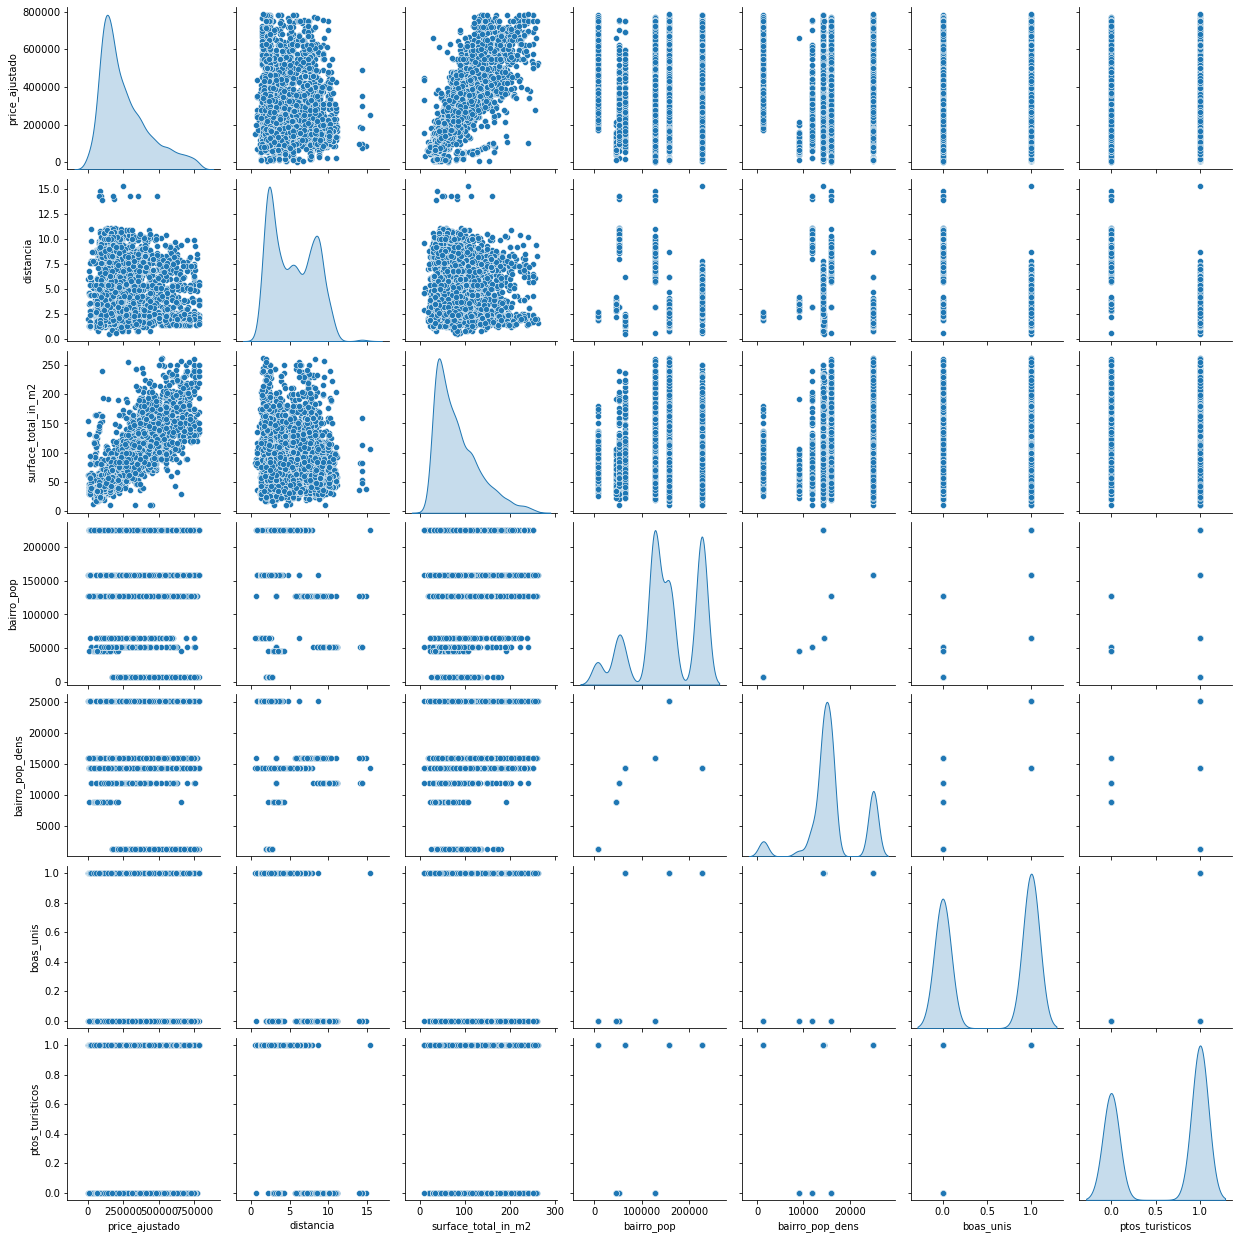

In [36]:
features_e_target = ['price_ajustado', 'distancia', 'surface_total_in_m2', 'bairro_pop', 'bairro_pop_dens', 'boas_unis', 'ptos_turisticos']

sns.pairplot(df[features_e_target], diag_kind = 'kde');

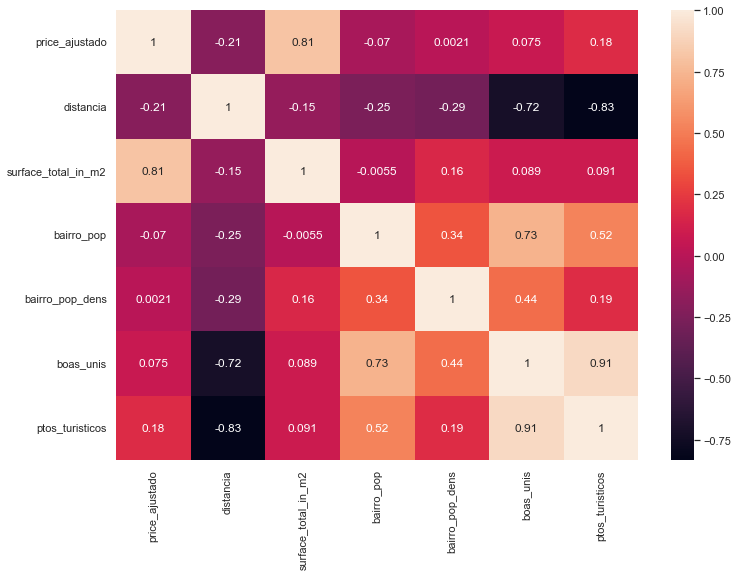

In [37]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df[features_e_target].corr(), annot=True);

## Selecionando colunas que serão utilizadas na criação do modelo.

In [38]:
features = ['distancia', 'surface_total_in_m2', 'bairro_pop', 'bairro_pop_dens', 'boas_unis', 'ptos_turisticos']

X = df[features]
y = df['price_ajustado']

print(f'Shape das features: {X.shape}')
print(f'Shape do target: {y.shape}')

Shape das features: (3986, 6)
Shape do target: (3986,)


In [39]:
# # separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 56)

print(f'Número de observações em treino: {X_train.shape[0]}')
print(f'Número de observações em teste: {X_test.shape[0]}')


Número de observações em treino: 2790
Número de observações em teste: 1196


In [40]:
from sklearn.preprocessing import StandardScaler

scaleX = StandardScaler()

numericos = ['distancia', 'surface_total_in_m2', 'bairro_pop', 'bairro_pop_dens']

X_train[numericos] = scaleX.fit_transform(X_train[numericos])  #Normalizando apenas os dados numéricos!! (antes normalizava dummies também, o que fazia o modelo prever pior)
X_test[numericos] = scaleX.transform(X_test[numericos])  #Normaliza dados de teste de acordo com Standard Scaler fit dos dados de treino

In [41]:
# criando constante do modelo OLS
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train)
non_reg_OLS = model.fit()
non_reg_OLS.summary()

#'distancia', 'surface_total_in_m2', 'bairro_pop', 'bairro_pop_dens', 'boas_unis', 'ptos_turisticos'

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         price_ajustado   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     1172.
Date:                Sat, 02 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:33:44   Log-Likelihood:                -35828.
No. Observations:                2790   AIC:                         7.167e+04
Df Residuals:                    2783   BIC:                         7.171e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.273e+05   5444.828     41.739      0.000    2.17e+05    2.38e+05
distancia             1.27e+04   3787.406      3.353      0.001    5272.463    2.01e+04
surface_total_in_m2  1.381e+05   1777.201     77.685      0.000    1.35e+05    1.42e+05
bairro_pop           4477.4776   3210.563      1.395      0.163   -1817.847    1.08e+04
bairro_pop_dens      5422.6384   2767.566      1.959      0.050      -4.052    1.08e+04
boas_unis           -2.196e+05   1.62e+04    -13.588      0.000   -2.51e+05   -1.88e+05
ptos_turisticos      2.556e+05   1.55e+04     16.490      0.000    2.25e+05    2.86e+05
==============================================================================
Omnibus:                      383.980   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3347.044
Skew:                           0.355   Prob(JB):                         0.00
Kurtosis:                       8.319   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
pd.DataFrame(X_train).head()

,const,distancia,surface_total_in_m2,bairro_pop,bairro_pop_dens,boas_unis,ptos_turisticos
17064,1.0,-0.692385,-0.829394,1.179380,-0.332528,1,1
16838,1.0,-0.931276,0.014504,0.116468,1.636919,1,1
15503,1.0,1.208577,-0.047245,-0.369402,-0.030239,0,0
1116,1.0,0.429915,-0.294239,-0.369402,-0.030239,0,0
15752,1.0,0.001495,-1.241052,1.179380,-0.332528,1,1


In [43]:
parametros = pd.DataFrame(non_reg_OLS.params, columns = ['Non Reg. OLS'])

### Aplicando o predict do modelo

In [44]:
# predizendo respostas

predictions_OLS = non_reg_OLS.predict(X_test)
predictions_OLS = pd.DataFrame(predictions_OLS, columns=['Pred. non_reg_OLS'])
predictions_OLS.head()

,Pred. non_reg_OLS
10478,392491.288824
11262,124386.211624
11003,99020.347659
192,250858.709117
14599,302960.408646


In [45]:
# fig, ax = plt.subplots(3, 3, sharey = 'row')

# ax[0, 0].lmplot(x="surface_total_in_m2", y="price_m2", data=df)

# ax[0, 1].hist(data_normal_2, label = 'data normal 2', alpha = 0.7);

# ax[0, 2].hist(data_normal_3, label = 'data normal 3', alpha = 1, color = "yellow")

# ax[1, 0].scatter(data_x, 50 * data_cos, marker = '+', color = (1.0, 0.2, 0.3), label = 'serie cos', alpha = 0.7)

# ax[1, 1].scatter(data_x, 60 * (data_cos + 1), marker = '*', color = "blue", label = 'serie cos modif', alpha = 1)

# ax[1, 2].hist(data_normal_1, label = 'data normal 1', alpha = 0.7, color = "lightblue")

# ax[1, 0].legend();

# grid = sns.FacetGrid(df, row = "sex", col = "time", margin_titles = True)

# h = sns.jointplot(x="surface_total_in_m2", y="price_m2", data=df, kind="reg")

Text(0.5, 1.0, 'Pred. OLS x Resíduos')

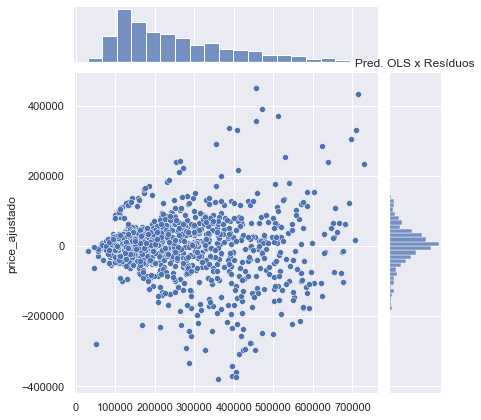

In [46]:
predito = np.array(predictions_OLS).reshape(len(predictions_OLS),)
resids = predito - y_test

g = sns.jointplot(x = predito, y = resids)
plt.title(label= 'Pred. OLS x Resíduos')

## Segundo modelo, utilizando Regularização Lasso e com Cross-Validation

In [47]:
from sklearn import linear_model, metrics

lassoCV = linear_model.LassoCV(alphas = [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 1, 5, 10], 
                               cv = 5
                              ).fit(X_train, y_train)

predictions_lassoCV = lassoCV.predict(X_test)
predictions_lassoCV = pd.DataFrame(predictions_lassoCV, columns=['Pred. Lasso Reg'])

lassoCV.score(X_train, y_train)

0.7164378437027035

In [48]:
best_alpha_lasso = lassoCV.alpha_

reg_lassoCV = model.fit_regularized(alpha = best_alpha_lasso, L1_wt = 1)

parametros_lassoCV = pd.DataFrame(reg_lassoCV.params, columns = ['Lasso Reg. OLS'])

comparacao_params = parametros.join(parametros_lassoCV)

comparacao_params

,Non Reg. OLS,Lasso Reg. OLS
const,227263.165370,220165.768568
distancia,12698.873388,8747.604923
surface_total_in_m2,138061.086072,138605.087525
bairro_pop,4477.477588,-8771.905238
bairro_pop_dens,5422.638438,-6648.896197
boas_unis,-219626.785468,-117244.559496
ptos_turisticos,255560.221128,173134.902649


## Terceiro modelo, utilizando Regularização Ridge e com Cross-Validation

In [49]:
ridgeCV = linear_model.RidgeCV(alphas = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50], 
                             cv = 5,
                             scoring = 'r2'
                            )

ridgeCV.fit(X_train, y_train)
predictions_ridgeCV = ridgeCV.predict(X_test)
predictions_ridgeCV = pd.DataFrame(predictions_ridgeCV, columns=['Pred. Ridge Reg'])

ridgeCV.score(X_train, y_train)

0.7164374572130934

In [50]:
best_alpha_ridge = ridgeCV.alpha_

reg_ridgeCV = model.fit_regularized(alpha = best_alpha_ridge, L1_wt = 0)

parametros_ridgeCV = pd.DataFrame(reg_ridgeCV.params, columns = ['Ridge Reg. OLS']).set_index(comparacao_params.index)

comparacao_params = comparacao_params.join(parametros_ridgeCV, on = comparacao_params.index)

comparacao_params

,Non Reg. OLS,Lasso Reg. OLS,Ridge Reg. OLS
const,227263.165370,220165.768568,172530.770509
distancia,12698.873388,8747.604923,14015.213919
surface_total_in_m2,138061.086072,138605.087525,125826.036026
bairro_pop,4477.477588,-8771.905238,-33115.338010
bairro_pop_dens,5422.638438,-6648.896197,-18332.551925
boas_unis,-219626.785468,-117244.559496,39752.314304
ptos_turisticos,255560.221128,173134.902649,79658.710368


## Quarto modelo, utilizando Regularização Elastic Net e com Cross-Validation

In [51]:
elastic_NetCV = linear_model.ElasticNetCV(l1_ratio = [0.85, 0.9, 0.95, 0.99, 1], 
                                    cv = 5,
                                    random_state= 2
                                    )

elastic_NetCV.fit(X_train, y_train)
predictions_elastic_NetCV = elastic_NetCV.predict(X_test)
predictions_elastic_NetCV = pd.DataFrame(predictions_elastic_NetCV, columns=['Pred. ElasticNet Reg'])

elastic_NetCV.score(X_train, y_train)

0.716158617023169

In [52]:
best_alpha_elasticNet = elastic_NetCV.alpha_

reg_elastic_NetCV = model.fit_regularized(alpha = best_alpha_elasticNet, L1_wt = elastic_NetCV.l1_ratio_)

parametros_elastic_NetCV = pd.DataFrame(reg_elastic_NetCV.params, columns = ['ElasticNet Reg. OLS']).set_index(comparacao_params.index)

comparacao_params = comparacao_params.join(parametros_elastic_NetCV, on = comparacao_params.index)

comparacao_params

,Non Reg. OLS,Lasso Reg. OLS,Ridge Reg. OLS,ElasticNet Reg. OLS
const,227263.165370,220165.768568,172530.770509,217992.472509
distancia,12698.873388,8747.604923,14015.213919,0.000000
surface_total_in_m2,138061.086072,138605.087525,125826.036026,138878.217265
bairro_pop,4477.477588,-8771.905238,-33115.338010,-21788.710915
bairro_pop_dens,5422.638438,-6648.896197,-18332.551925,-20690.528306
boas_unis,-219626.785468,-117244.559496,39752.314304,0.000000
ptos_turisticos,255560.221128,173134.902649,79658.710368,68833.006548


In [53]:
print(best_alpha_ridge, best_alpha_lasso, best_alpha_elasticNet)

0.1 5.0 138.47369859192133


## Quinto modelo, utilizando ARDRegression e com Cross-Validation

In [54]:
from sklearn.model_selection import KFold, cross_val_score
ard_reg = linear_model.ARDRegression()
kf = KFold(n_splits = 5, shuffle = True, random_state = 2)

cv_scores = cross_val_score(ard_reg,
                            X_train, 
                            y_train, 
                            cv = kf
                            )

ard_reg.fit(X_train, y_train)

predictions_ArdReg = ard_reg.predict(X_test)
predictions_ArdReg = pd.DataFrame(predictions_ArdReg, columns=['Pred. ARD Reg'])

cv_scores

array([0.71041886, 0.65587959, 0.68332904, 0.70576873, 0.71571667])

In [55]:
ard_reg.get_params()

{'alpha_1': 1e-06,
 'alpha_2': 1e-06,
 'compute_score': False,
 'copy_X': True,
 'fit_intercept': True,
 'lambda_1': 1e-06,
 'lambda_2': 1e-06,
 'n_iter': 300,
 'normalize': 'deprecated',
 'threshold_lambda': 10000.0,
 'tol': 0.001,
 'verbose': False}

In [56]:
print(features)
print('y_test sample VS. ARD Reg. pred.: \n', y_test[0:10])
print('y_pred sample: ', predictions_ArdReg[0:10].astype(int))
print('MAE: ', metrics.mean_absolute_error(y_test, predictions_ArdReg))
print('MSE: ', metrics.mean_squared_error(y_test, predictions_ArdReg))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions_ArdReg)))
print('R2: ', metrics.r2_score(y_test, predictions_ArdReg))
print('MAPE: ', metrics.mean_absolute_percentage_error(y_test, predictions_ArdReg))

['distancia', 'surface_total_in_m2', 'bairro_pop', 'bairro_pop_dens', 'boas_unis', 'ptos_turisticos']
y_test sample VS. ARD Reg. pred.: 
 10478    265000.0
11262    140000.0
11003    145000.0
192      307650.0
14599    319000.0
1600     690000.0
10630    395000.0
1045     144400.0
9414     700000.0
10427    198000.0
Name: price_ajustado, dtype: float64
y_pred sample:     Pred. ARD Reg
0         391247
1         122695
2          98661
3         250104
4         302182
5         673050
6         429822
7          89562
8         582639
9         172382
MAE:  55200.21790915457
MSE:  7302298105.372419
RMSE:  85453.48503936174
R2:  0.7473584220652261
MAPE:  0.6033532520486933


## Adicionando métricas ao df de Comaparação de Parâmetros

In [57]:
nan_list = []
for i in range(0,len(features)+1):
    nan_list.append(np.NaN)

comparacao_params['ARD Regression'] = nan_list

comparacao_params.loc['MAE'] = [metrics.mean_absolute_error(y_test, predictions_OLS),
                                metrics.mean_absolute_error(y_test, predictions_lassoCV),
                                metrics.mean_absolute_error(y_test, predictions_ridgeCV),
                                metrics.mean_absolute_error(y_test, predictions_elastic_NetCV),
                                metrics.mean_absolute_error(y_test, predictions_ArdReg)
                                ]

comparacao_params.loc['MAPE'] = [metrics.mean_absolute_percentage_error(y_test, predictions_OLS),
                                 metrics.mean_absolute_percentage_error(y_test, predictions_lassoCV),
                                 metrics.mean_absolute_percentage_error(y_test, predictions_ridgeCV),
                                 metrics.mean_absolute_percentage_error(y_test, predictions_elastic_NetCV),
                                 metrics.mean_absolute_percentage_error(y_test, predictions_ArdReg)
                                 ]

comparacao_params.loc['RMSE'] = [np.sqrt(metrics.mean_squared_error(y_test, predictions_OLS)),
                                 np.sqrt(metrics.mean_squared_error(y_test, predictions_lassoCV)),
                                 np.sqrt(metrics.mean_squared_error(y_test, predictions_ridgeCV)),
                                 np.sqrt(metrics.mean_squared_error(y_test, predictions_elastic_NetCV)),
                                 np.sqrt(metrics.mean_squared_error(y_test, predictions_ArdReg))
                                 ]

comparacao_params.loc['R2'] = [metrics.r2_score(y_test, predictions_OLS),
                               metrics.r2_score(y_test, predictions_lassoCV),
                               metrics.r2_score(y_test, predictions_ridgeCV),
                               metrics.r2_score(y_test, predictions_elastic_NetCV),
                               metrics.r2_score(y_test, predictions_ArdReg)
                               ]

print('                        Tabela Comparativa - Paramêtros e Métricas')
comparacao_params

                        Tabela Comparativa - Paramêtros e Métricas


,Non Reg. OLS,Lasso Reg. OLS,Ridge Reg. OLS,ElasticNet Reg. OLS,ARD Regression
const,227263.165370,220165.768568,172530.770509,217992.472509,NaN
distancia,12698.873388,8747.604923,14015.213919,0.000000,NaN
surface_total_in_m2,138061.086072,138605.087525,125826.036026,138878.217265,NaN
bairro_pop,4477.477588,-8771.905238,-33115.338010,-21788.710915,NaN
bairro_pop_dens,5422.638438,-6648.896197,-18332.551925,-20690.528306,NaN
boas_unis,-219626.785468,-117244.559496,39752.314304,0.000000,NaN
ptos_turisticos,255560.221128,173134.902649,79658.710368,68833.006548,NaN
MAE,54993.694789,55000.665848,55003.172048,55252.460233,55200.217909
MAPE,0.602106,0.602178,0.602204,0.605031,0.603353
RMSE,85291.368515,85298.407239,85301.308254,85536.666430,85453.485039


## Comparativo das predições

In [58]:
#Juntando predição de cada modelo

comparacao_preditos = pd.DataFrame(np.array(y_test), columns = ['y_test'])
comparacao_preditos = comparacao_preditos.join(predictions_OLS, on = y_test.index)
comparacao_preditos = comparacao_preditos.join(predictions_lassoCV, on = comparacao_preditos.index)
comparacao_preditos = comparacao_preditos.join(predictions_ridgeCV, on = comparacao_preditos.index)
comparacao_preditos = comparacao_preditos.join(predictions_elastic_NetCV, on = comparacao_preditos.index)

comparacao_preditos = comparacao_preditos.join(predictions_ArdReg, on = comparacao_preditos.index)

print('                              Tabela Comparativa - Predições')
comparacao_preditos

                              Tabela Comparativa - Predições


,y_test,Pred. non_reg_OLS,Pred. Lasso Reg,Pred. Ridge Reg,Pred. ElasticNet Reg,Pred. ARD Reg
0,265000.0,392491.288824,392433.671402,392412.477877,390898.401097,391247.266387
1,140000.0,124386.211624,124324.655194,124306.641057,122686.215642,122695.360893
2,145000.0,99020.347659,99046.903695,99057.580505,99758.049403,98661.112460
3,307650.0,250858.709117,250852.477831,250855.130938,250688.898276,250104.068379
4,319000.0,302960.408646,302921.253122,302913.690407,301876.011560,302182.508697
...,...,...,...,...,...,...
1191,187000.0,205374.421772,205390.943616,205400.280327,205834.210067,204936.273359
1192,128000.0,267750.757880,268170.721229,268326.665627,279358.774543,276379.273326
1193,170000.0,177016.145300,176987.507748,176981.369404,176226.688817,175866.444498
1194,135000.0,149311.807173,149274.899750,149265.219162,148290.063904,148460.330763


###

eval_env: 1


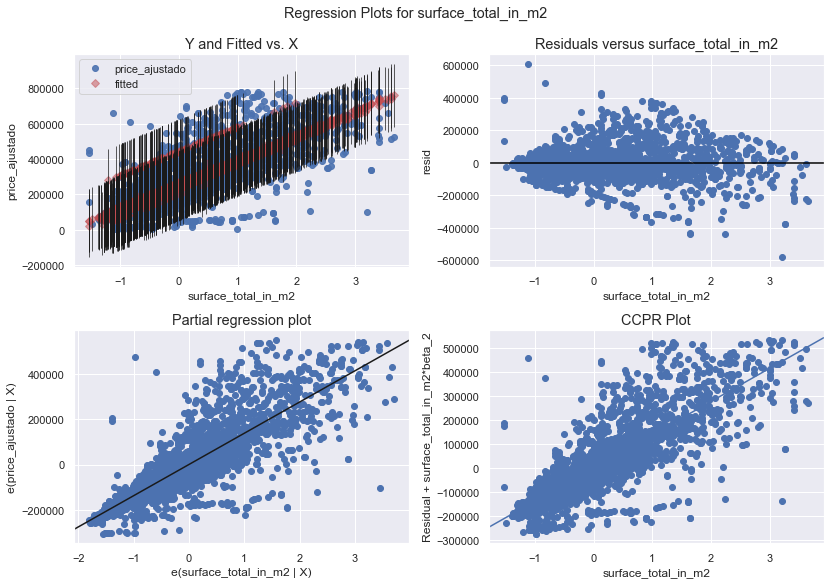

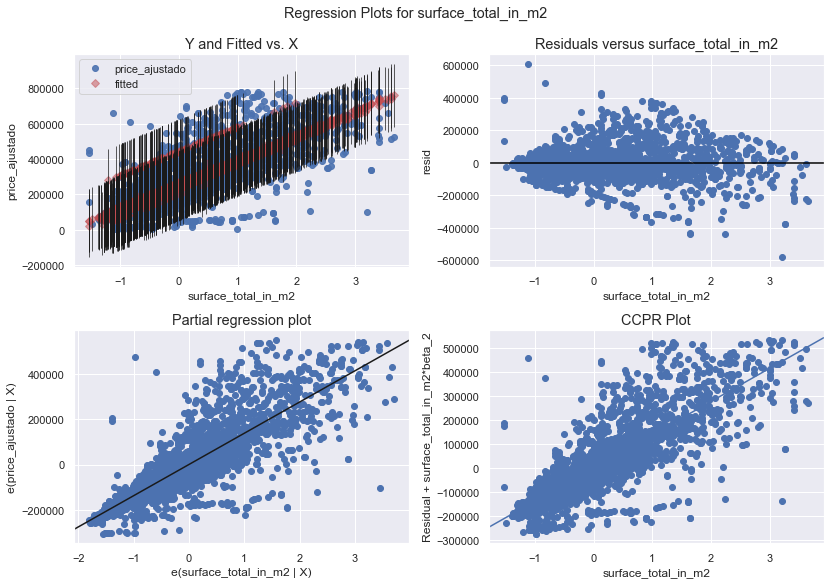

In [59]:
from statsmodels.api import graphics

sm.graphics.plot_regress_exog(non_reg_OLS, exog_idx=2)

In [60]:
# top 5 bairros com maior média de preço

# df[['place_name', 'price_m2']].groupby('place_name').mean('price_m2').sort_values(by = 'price_m2', ascending = False).round(2).head(5)

### *Future use

In [61]:
# from sklearn.model_selection import cross_val_score, KFold
# kf = KFold(n_splits = 5,
#            shuffle = True,
#            random_state = 12
#           )

# cv_scores = cross_val_score(model,
#                             X_train, 
#                             y_train, 
#                             cv = kf
#                             )

# cv_scores